# Correlation Analysis 
## Stock Price Movements And Macroeconomic Indicators
Yvonne Chang

### Project Abstract 

This project aims to analyze the stock price movements of six selected companies and determine the macroeconomic indicators that have the most significant impact on these stocks. By examining historical stock data alongside various economic indicators such as GDP, inflation rates, and unemployment rates, the project goal is to identify correlations between stock price movements and macroeconomic indicators and provide insights and explaination. 

### Table of Contents

- [Read in Data: Stock Price](#ReadSP)


- [Read in Data: Macroeconomic Indicators](#ReadMI)


- [Visualization](#Visualization)
    - [Stock prices](#Stockprices)
    - [Macroeconomic indicators](#Macroeconomicindicators)
    - [Plot stock prices and macroeconomy indicator trends together](#together)


- [Correlation Analysis](#CorrelationAnalysis)


- [Summary](#Summary)
    - [Quick Summary](#QuickSummary)
    - [Detailed Summary](#DetailedSummary)


- [Conclusion And The Next Step](#ConclusionNextStep)

In [1]:
# Install Python’s nasdaqdatalink package if haven't installed
# !pip install nasdaq-data-link

In [2]:
# Import packages 
import nasdaqdatalink
import pandas as pd 
import numpy as np

# Read in Data: Stock Price<a name="ReadSP"></a>

## Data Source: [WIKI Prices](https://data.nasdaq.com/databases/WIKIP)

According to the official summary, this dataset provides end of day stock prices, dividends and splits for 3,000 US companies. As of April 11, 2018 this data feed is no longer actively supported by the Quandl community. Therefore, investment or analysis after this date is not recommeded.  


## Selected Companies: TSLA, AAPL, MSFT, WMT, DIS, MMM

- **Tesla** `TSLA`: Tesla engages in the design, development, manufacture, and sale of fully electric vehicles, energy generation and storage systems. 
- **Apple** `AAPL`: Apple engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and various related services.
- **Microsoft** `MSFT`: Microsoft engages in the development and support of software, services, devices, and solutions, operating through productivity and business processes, intelligent cloud, and more personal computing. 
- **Walmart** `WMT`: Walmart is a multi-channel retailer engaging in the retail and wholesale business. 
- **Disney** `DIS`: Disney is a diversified international family entertainment and media enterprise. 
- **3M** `MMM`: 3M is a multinational conglomerate, which manufactures industrial, safety, and consumer products.

In [3]:
# Set api_key to get data
nasdaqdatalink.ApiConfig.api_key = 'Qn79HvJ6xG7GTXYgRsUM'

In [4]:
# Read in the datasets
tsla = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'TSLA', paginate = True)
aapl = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'AAPL', paginate = True)
msft = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'MSFT', paginate = True)
wmt = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'WMT', paginate = True) 
dis = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'DIS', paginate = True)
mmm = nasdaqdatalink.get_table('WIKI/PRICES', ticker = 'MMM', paginate = True)

In [5]:
# Display the first five records to check 
tsla.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,TSLA,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,TSLA,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,TSLA,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,TSLA,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,TSLA,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [6]:
# Display the last five records to check 
tsla.tail()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
1944,TSLA,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
1945,TSLA,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
1946,TSLA,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
1947,TSLA,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,TSLA,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


In [7]:
# Display the last five records to check 
msft.tail()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
8071,MSFT,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07
8072,MSFT,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
8073,MSFT,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
8074,MSFT,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
8075,MSFT,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09


In [8]:
# Construct the selected companies list (for the convenience of coding) 
selected_companies = [tsla, aapl, msft, wmt, dis, mmm]

### Check the dimension of dataframes

In [9]:
# Check the dimension of dataframes
for company in selected_companies:
    print(f'{company.ticker.unique()}: {company.shape}') 

['TSLA']: (1949, 14)
['AAPL']: (9400, 14)
['MSFT']: (8076, 14)
['WMT']: (11496, 14)
['DIS']: (14155, 14)
['MMM']: (12087, 14)


### Check whether dataframes have correct data types

In [10]:
# Check whether the `date` is in datetime form, and whether the numbers are in numeric forms
# Write a for-loop to display data types

for company in selected_companies:
    print(company.ticker.unique())
    print(company.dtypes)
    print('\n')

['TSLA']
ticker                 object
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dtype: object


['AAPL']
ticker                 object
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dtype: object


['MSFT']
ticker                 object
date           datetime64[ns]
open                  float64
high       

### Check missing values 

In [11]:
# Check whether there are missing values 
# values() method: it returns a view object, and this view object contains the values of the dictionary, as a list

for company in selected_companies:
    if company.isnull().values.any():
        print(f'{company.ticker.unique()}: Has missing value')
    else: 
        print(f'{company.ticker.unique()}: No missing value')

['TSLA']: No missing value
['AAPL']: No missing value
['MSFT']: No missing value
['WMT']: No missing value
['DIS']: No missing value
['MMM']: No missing value


In [12]:
# After checking the data type and missing values, 
# sort the rows by 'date' field just to make sure that we have the correct order of the dates

for company in selected_companies:
    company = company.sort_values(by = 'date')

### Dataframe summary: the first and the last record dates

In [13]:
# Construct a dataframe to check the first and last record for each company 

# 1. Construct a dictionary 
dates = {'first_record_date': [tsla.date.min(), aapl.date.min(), msft.date.min(), wmt.date.min(), dis.date.min(), mmm.date.min()], 
         'last_record_date': [tsla.date.max(), aapl.date.max(), msft.date.max(), wmt.date.max(), dis.date.max(), mmm.date.max()]}

# 2. Transfer into a dataframe then display
dates = pd.DataFrame(dates)
dates.index = ['TSLA', 'AAPL', 'MSFT', 'WMT', 'DIS', 'MMM']
dates

,first_record_date,last_record_date
TSLA,2010-06-29,2018-03-27
AAPL,1980-12-12,2018-03-27
MSFT,1986-03-13,2018-03-27
WMT,1972-08-25,2018-03-27
DIS,1962-01-02,2018-03-27
MMM,1970-01-02,2018-03-07


### Note 
1. All stock price dataframes have the correct format for the date and numerical columns. 
2. There are no missing value problems in the dataframes.  
3. All the companies have the same date of the last record: 2018-03-27.  
4. TSLA's initial public offering (IPO) was on June 29, 2010, which is the latest among all.  

# Read in Data: Macroeconomic Indicators<a name="ReadMI"></a>

## Data Source: [Federal Reserve Bank of St. Louis](https://www.stlouisfed.org/) 

According to [DataBases form Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/categories/), macroeconomic indicators can be categorized as several important categories, and for each category, I choose some indicators that are typically important to investigate.  

- Please note that the following data will be represented as the form of:  
`variable name when importing data`: indicator full name. (Units; Frequency). leading / lagging economic indicator. [Data Source].

- If data from Federal Reserve Bank of St. Louis doesn't cover the period that we want to analyze, I will use an alternative data source from [The Wall Street Journal Market Data](https://www.wsj.com/market-data)). 


## Data Categories

#### Money, Banking, & Finance
- Stock Market Indexes
    - `SP500`: S&P 500. (Index; Daily, close). Leading indicator. [Data Source](https://www.wsj.com/market-data/quotes/index/SPX/historical-prices)
    - `DJIA`: Dow Jones Industrial Average. (Index; Daily, close). Leading indicator. [Data Source](https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices)
    - `NASDAQCOM`: NASDAQ Composite Index. (Index; Daily, close). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/NASDAQCOM)
    - `NASDAQ100`: NASDAQ 100 Index. (Index; Daily, close). Leading indicator [Data Source](https://fred.stlouisfed.org/series/NASDAQ100)
- Interest Rates
    - `BAMLH0A0HYM2`: ICE BofA US High Yield Index Option-Adjusted Spread, high yield. (Percent; Daily, close). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/BAMLH0A0HYM2)
    - `DGS10`: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis. (Percent; Daily). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/DGS10) 
    - `T10Y2Y`: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity. (Percent; Daily). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/T10Y2Y) 
    - `T5YIE`: 5-Year Breakeven Inflation Rate. (Percent; Daily). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/T5YIE) 
- Exchange Rates
    - `DEXUSEU`: U.S. Dollars to Euro Spot Exchange Rate. (U.S. Dollars to One Euro; Daily). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/DEXUSEU) 
    - `DTWEXBGS`: Nominal Broad U.S. Dollar Index. (Index; Daily). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/DTWEXBGS) 
        

#### Population, Employment, & Labor Markets
- `UNRATE`: Unemployment Rate. (Percent; Monthly). Lagging indicator. [Data Source](https://fred.stlouisfed.org/series/UNRATE)


#### National Accounts
- `NA000334Q`: Gross Domestic Product. (Millions of Dollars; Quarterly). Lagging indicator. [Data Source](https://fred.stlouisfed.org/series/NA000334Q)


#### Prices
- `CPILFESL`: Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average. (Index, 1982-1984=100; Monthly). Lagging indicator. [Data Source](https://fred.stlouisfed.org/series/CPILFESL)
- `PPIACO`: Producer Price Index by Commodity: All Commodities. (Index, 1982=100; Monthly). Leading indicator for CPI. [Data Source](https://fred.stlouisfed.org/series/PPIACO)
- `UMCSENT`:  University of Michigan: Consumer Sentiment. (Index, 1966:Q1=100; Monthly). Leading indicator. [Data Source](https://fred.stlouisfed.org/series/UMCSENT)

In [14]:
# Selected 15 indicators
SP500 = pd.read_csv('SP500.csv') 
DJIA = pd.read_csv('DJIA.csv')
NASDAQCOM = pd.read_csv('NASDAQCOM.csv')
NASDAQ100 = pd.read_csv('NASDAQ100.csv')
BAMLH0A0HYM2 = pd.read_csv('BAMLH0A0HYM2.csv')
DGS10 = pd.read_csv('DGS10.csv')
T10Y2Y = pd.read_csv('T10Y2Y.csv')
T5YIE = pd.read_csv('T5YIE.csv')
DEXUSEU = pd.read_csv('DEXUSEU.csv')
DTWEXBGS = pd.read_csv('DTWEXBGS.csv')
UNRATE = pd.read_csv('UNRATE.csv')
NA000334Q = pd.read_csv('NA000334Q.csv')
CPILFESL = pd.read_csv('CPILFESL.csv')
PPIACO = pd.read_csv('PPIACO.csv')
UMCSENT = pd.read_csv('UMCSENT.csv')

In [15]:
# Display the first five records to check 
DJIA.head()

,Date,Open,High,Low,Close
0,12/31/20,30417.64,30637.47,30344.50,30606.48
1,12/30/20,30415.09,30525.35,30393.04,30409.56
2,12/29/20,30492.07,30588.79,30274.24,30335.67
3,12/28/20,30283.23,30525.56,30283.23,30403.97
4,12/24/20,30155.92,30209.67,30099.30,30199.87


In [16]:
# Display the last five records to check 
SP500.tail()

,Date,Open,High,Low,Close
5279,01/07/00,1441.47,1441.47,1400.53,1441.47
5280,01/06/00,1403.45,1411.90,1392.02,1403.45
5281,01/05/00,1402.11,1413.27,1377.68,1402.11
5282,01/04/00,1399.42,1455.22,1397.43,1399.42
5283,01/03/00,1455.22,1478.00,1438.36,1455.22


In [17]:
# Display the first five records to check 
BAMLH0A0HYM2.head()

,DATE,BAMLH0A0HYM2
0,2000-01-03,4.68
1,2000-01-04,4.81
2,2000-01-05,4.77
3,2000-01-06,4.82
4,2000-01-07,4.86


## Process `SP500` and `DJIA` separately since they are from a different data source

In [18]:
# Check SP500 separately since it is from a different source
# Mind that there are spaces in the column names 
SP500.columns 

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [19]:
# Check DJIA separately since it is from a different source
# Mind that there are spaces in the column names 
DJIA.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [20]:
# Process SP500 separately to meet the form of other data for the convenience of later actions

SP500 = SP500.rename(columns = {'Date': 'DATE', ' Close': 'SP500'})
SP500 = SP500.drop([' Open', ' High', ' Low'], axis = 1)
SP500.DATE = pd.to_datetime(SP500.DATE)
SP500.SP500 = pd.to_numeric(SP500.SP500)

SP500.head()

<ipython-input-20-2c0d7645fdd2>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SP500.DATE = pd.to_datetime(SP500.DATE)


,DATE,SP500
0,2020-12-31,3756.07
1,2020-12-30,3732.04
2,2020-12-29,3727.04
3,2020-12-28,3735.36
4,2020-12-24,3703.06


In [21]:
# Process DJIA separately to meet the form of other data for the convenience of later actions

DJIA = DJIA.rename(columns = {'Date': 'DATE', ' Close': 'DJIA'})
DJIA = DJIA.drop([' Open', ' High', ' Low'], axis = 1)
DJIA.DATE = pd.to_datetime(DJIA.DATE)
DJIA.DJIA = pd.to_numeric(DJIA.DJIA)

DJIA.head()

<ipython-input-21-ad4fe6762e87>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DJIA.DATE = pd.to_datetime(DJIA.DATE)


,DATE,DJIA
0,2020-12-31,30606.48
1,2020-12-30,30409.56
2,2020-12-29,30335.67
3,2020-12-28,30403.97
4,2020-12-24,30199.87


In [22]:
# Check the dimension
print(SP500.shape)
print(DJIA.shape)

(5284, 2)
(5284, 2)


## Process all indicators

In [23]:
# Construct the selected indicators list (for the convenience of coding) 
macroecon_indicators = [SP500, DJIA, NASDAQCOM, NASDAQ100, BAMLH0A0HYM2, DGS10, T10Y2Y, T5YIE, DEXUSEU, DTWEXBGS, UNRATE, NA000334Q, CPILFESL, PPIACO, UMCSENT]
len(macroecon_indicators)

15

### Check whether dataframes have correct data types

In [24]:
# Check whether the `date` is in datetime form, and whether the numbers are in numeric form
# Write a for-loop to display data types

for indicator in macroecon_indicators: 
    print(f'{indicator.columns[1]}:')
    print(indicator.dtypes)
    print('\n')

SP500:
DATE     datetime64[ns]
SP500           float64
dtype: object


DJIA:
DATE    datetime64[ns]
DJIA           float64
dtype: object


NASDAQCOM:
DATE         object
NASDAQCOM    object
dtype: object


NASDAQ100:
DATE         object
NASDAQ100    object
dtype: object


BAMLH0A0HYM2:
DATE            object
BAMLH0A0HYM2    object
dtype: object


DGS10:
DATE     object
DGS10    object
dtype: object


T10Y2Y:
DATE      object
T10Y2Y    object
dtype: object


T5YIE:
DATE     object
T5YIE    object
dtype: object


DEXUSEU:
DATE       object
DEXUSEU    object
dtype: object


DTWEXBGS:
DATE        object
DTWEXBGS    object
dtype: object


UNRATE:
DATE       object
UNRATE    float64
dtype: object


NA000334Q:
DATE          object
NA000334Q    float64
dtype: object


CPILFESL:
DATE         object
CPILFESL    float64
dtype: object


PPIACO:
DATE       object
PPIACO    float64
dtype: object


UMCSENT:
DATE        object
UMCSENT    float64
dtype: object




### Note
We can see that there are incorrect data types, and we will transform the data types later.  

### Check missing values

In [25]:
for indicator in macroecon_indicators: 
    print(f'{indicator.columns[1]}:')
    print(indicator.shape)
    
    if indicator.isnull().values.any():
        print('Has missing value') 
    else:
        print('No missing value') 
    print('\n')

SP500:
(5284, 2)
No missing value


DJIA:
(5284, 2)
No missing value


NASDAQCOM:
(5479, 2)
No missing value


NASDAQ100:
(5479, 2)
No missing value


BAMLH0A0HYM2:
(5549, 2)
No missing value


DGS10:
(5479, 2)
No missing value


T10Y2Y:
(5592, 2)
No missing value


T5YIE:
(4984, 2)
No missing value


DEXUSEU:
(6138, 2)
No missing value


DTWEXBGS:
(4236, 2)
No missing value


UNRATE:
(252, 2)
No missing value


NA000334Q:
(84, 2)
No missing value


CPILFESL:
(252, 2)
No missing value


PPIACO:
(252, 2)
No missing value


UMCSENT:
(252, 2)
No missing value




### Note 
Currently, there are no missing value problems. However, some data is in 'object' type, and if the data and NaN are both in 'object' type, we can't detect missing value problems here. Therefore, we need to **transform the data types, check data types again, and detect missing values again.**   

### Conduct data types transformation, then check again the data types and missing values

In [26]:
for df in macroecon_indicators:
    df.DATE = pd.to_datetime(df['DATE']) # Transform into datetime data
    df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') 
    df.rename(columns = {'DATE': 'date'}, inplace = True) # Rename `DATE` as `date` to keep in the same format as stock price data
        
    # suppliment comments: 
    # set the parameter errors='coerce': then invalid parsing will be set as NaN. Through this parameter setting, we can ensure that any non-numeric values are converted to NaN 

In [27]:
# Check the data types again
for indicator in macroecon_indicators: 
    print(f'{indicator.columns[1]}:')
    print(indicator.dtypes)
    print('\n')

SP500:
date     datetime64[ns]
SP500           float64
dtype: object


DJIA:
date    datetime64[ns]
DJIA           float64
dtype: object


NASDAQCOM:
date         datetime64[ns]
NASDAQCOM           float64
dtype: object


NASDAQ100:
date         datetime64[ns]
NASDAQ100           float64
dtype: object


BAMLH0A0HYM2:
date            datetime64[ns]
BAMLH0A0HYM2           float64
dtype: object


DGS10:
date     datetime64[ns]
DGS10           float64
dtype: object


T10Y2Y:
date      datetime64[ns]
T10Y2Y           float64
dtype: object


T5YIE:
date     datetime64[ns]
T5YIE           float64
dtype: object


DEXUSEU:
date       datetime64[ns]
DEXUSEU           float64
dtype: object


DTWEXBGS:
date        datetime64[ns]
DTWEXBGS           float64
dtype: object


UNRATE:
date      datetime64[ns]
UNRATE           float64
dtype: object


NA000334Q:
date         datetime64[ns]
NA000334Q           float64
dtype: object


CPILFESL:
date        datetime64[ns]
CPILFESL           float64
dtype: ob

In [28]:
# Check NaN values again
for indicator in macroecon_indicators: 
    if indicator.isnull().values.any():
        print(f'{indicator.columns[1]}: Has missing value')
        print(f'Missing amount: {indicator.isnull().values.sum()}')
        print('\n')

NASDAQCOM: Has missing value
Missing amount: 194


NASDAQ100: Has missing value
Missing amount: 195


BAMLH0A0HYM2: Has missing value
Missing amount: 68


DGS10: Has missing value
Missing amount: 226


T10Y2Y: Has missing value
Missing amount: 230


T5YIE: Has missing value
Missing amount: 203


DEXUSEU: Has missing value
Missing amount: 235


DTWEXBGS: Has missing value
Missing amount: 164




### Handling missing values 
To handling missing values, the simplest ways are to flag, drop, or impute missing data, but before that we need to check the missing mechanism to make sure we’re not losing important information contained in the missing.  

- **Missing completely at random, MCAR**: The missing mechanism is not containing useful information. Thus, the imputation method is valid; one can also simply drop the rows with missing values. 

- **Missing at random, MAR**: There is some observed mechanism/factor behind the fact of missing, and once the missing mechanism is included in the model, dropping missing values won’t hurt model performance and interpretation. 

- **Missing not at random, MNAR**: The missing mechanism is unknown, so simply dropping might lose some information. Therefore, one has to include some model for why the data are missing and what the likely values are, since analyses without considering the information contained in the missing values will lead to biased conclusions. 


Back to this case, consider the amount of missing data is small, and these are all government or open economic data source that don't tend to hide these data due to the public pressure. And since macroeconomic indicators are time series data, which will be affected by the economic environment at specific time stamps, and thus might be difficult to impute. Therefore, we will drop rows with missing values, and this won't hurt the analysis.  

In [29]:
# Drop rows with missing value in these dataframes
NASDAQCOM.dropna(subset = ['NASDAQCOM'], inplace = True)
NASDAQ100.dropna(subset = ['NASDAQ100'], inplace = True)
BAMLH0A0HYM2.dropna(subset = ['BAMLH0A0HYM2'], inplace = True)
DGS10.dropna(subset = ['DGS10'], inplace = True)
T10Y2Y.dropna(subset = ['T10Y2Y'], inplace = True)
T5YIE.dropna(subset = ['T5YIE'], inplace = True)
DEXUSEU.dropna(subset = ['DEXUSEU'], inplace = True)
DTWEXBGS.dropna(subset = ['DTWEXBGS'], inplace = True)

In [30]:
# Check NaN values again
for indicator in macroecon_indicators: 
    if indicator.isnull().values.any():
        print(f'{indicator.columns}: Has missing value')

### Note 
Nothing displayed, so now there are no missing values, and dataframes are all in the correct data types.  

### Select subsets for correlation analysis

Since stock price and economic indicators are time series data, the correlation analysis should use `date` as the index to merge two data sources that we are going to compare, and we only investigate the time that two data both exist. Therefore, the following analysis will focus on correlation **<font color="blue">in the given analysis period: 2010-06-29 (the first day of TSLA's IPO) to 2018-03-27 (the latest record date from WIKI data source).</font>**  

Tesla's initial public offering (IPO) was on June 29, 2010, which is the latest among the six selected companies, so we use this date as a lower bond of the `date` field in the sub-dataframes. We select a subset by `date` and save the subsets using the `sub_` prefix in the chunk below. 

In [31]:
# Select subsets
sub_SP500 = SP500[(SP500.date >= tsla.date.min()) & (SP500.date <= tsla.date.max())].sort_values(by = 'date')
sub_DJIA = DJIA[(DJIA.date >= tsla.date.min()) & (DJIA.date <= tsla.date.max())].sort_values(by = 'date')
sub_NASDAQCOM = NASDAQCOM[(NASDAQCOM.date >= tsla.date.min()) & (NASDAQCOM.date <= tsla.date.max())].sort_values(by = 'date')
sub_NASDAQ100 = NASDAQ100[(NASDAQ100.date >= tsla.date.min()) & (NASDAQ100.date <= tsla.date.max())].sort_values(by = 'date')
sub_BAMLH0A0HYM2 = BAMLH0A0HYM2[(BAMLH0A0HYM2.date >= tsla.date.min()) & (BAMLH0A0HYM2.date <= tsla.date.max())].sort_values(by = 'date')
sub_DGS10 = DGS10[(DGS10.date >= tsla.date.min()) & (DGS10.date <= tsla.date.max())].sort_values(by = 'date')
sub_T10Y2Y = T10Y2Y[(T10Y2Y.date >= tsla.date.min()) & (T10Y2Y.date <= tsla.date.max())].sort_values(by = 'date')
sub_T5YIE = T5YIE[(T5YIE.date >= tsla.date.min()) & (T5YIE.date <= tsla.date.max())].sort_values(by = 'date')
sub_DEXUSEU = DEXUSEU[(DEXUSEU.date >= tsla.date.min()) & (DEXUSEU.date <= tsla.date.max())].sort_values(by = 'date')
sub_DTWEXBGS = DTWEXBGS[(DTWEXBGS.date >= tsla.date.min()) & (DTWEXBGS.date <= tsla.date.max())].sort_values(by = 'date')
sub_UNRATE = UNRATE[(UNRATE.date >= tsla.date.min()) & (UNRATE.date <= tsla.date.max())].sort_values(by = 'date')
sub_NA000334Q = NA000334Q[(NA000334Q.date >= tsla.date.min()) & (NA000334Q.date <= tsla.date.max())].sort_values(by = 'date')
sub_CPILFESL = CPILFESL[(CPILFESL.date >= tsla.date.min()) & (CPILFESL.date <= tsla.date.max())].sort_values(by = 'date')
sub_PPIACO = PPIACO[(PPIACO.date >= tsla.date.min()) & (PPIACO.date <= tsla.date.max())].sort_values(by = 'date')
sub_UMCSENT = UMCSENT[(UMCSENT.date >= tsla.date.min()) & (UMCSENT.date <= tsla.date.max())].sort_values(by = 'date')

In [32]:
# Display the first five records to check 
sub_SP500.head()

,date,SP500
2646,2010-06-29,1041.24
2645,2010-06-30,1030.71
2644,2010-07-01,1027.37
2643,2010-07-02,1022.58
2642,2010-07-06,1028.06


In [33]:
# Display the last five records to check 
sub_SP500.tail()

,date,SP500
701,2018-03-21,2711.93
700,2018-03-22,2643.69
699,2018-03-23,2588.26
698,2018-03-26,2658.55
697,2018-03-27,2612.62


In [34]:
# Construct the selected indicators list (for the convenience of coding) 

sub_macroecon_indicators = [sub_SP500, sub_DJIA, sub_NASDAQCOM, sub_NASDAQ100, sub_BAMLH0A0HYM2, sub_DGS10, sub_T10Y2Y, sub_T5YIE, sub_DEXUSEU, sub_DTWEXBGS, sub_UNRATE, sub_NA000334Q, sub_CPILFESL, sub_PPIACO, sub_UMCSENT]
len(sub_macroecon_indicators)

15

# Visualization<a name="Visualization"></a>

## Stock prices<a name="Stockprices"></a>

In [35]:
# We also select subsets for the six companies
sub_tsla = tsla
sub_aapl = aapl[aapl.date >= tsla.date.min()]
sub_msft = msft[msft.date >= tsla.date.min()]
sub_wmt = wmt[wmt.date >= tsla.date.min()]
sub_dis = dis[dis.date >= tsla.date.min()]
sub_mmm = mmm[mmm.date >= tsla.date.min()]

In [36]:
# Reset the 'date' field as index for the convenience of plotting 
sub_tsla.set_index('date', inplace = True)
sub_aapl.set_index('date', inplace = True)
sub_msft.set_index('date', inplace = True)
sub_wmt.set_index('date', inplace = True)
sub_dis.set_index('date', inplace = True)
sub_mmm.set_index('date', inplace = True)

In [37]:
# Display the first five records to check 
sub_mmm.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-07,MMM,231.22,236.22,230.59,235.57,2213792.0,0.0,1.0,231.22,236.22,230.59,235.57,2213792.0
2018-03-06,MMM,234.05,235.92,230.80,233.66,2089047.0,0.0,1.0,234.05,235.92,230.80,233.66,2089047.0
2018-03-05,MMM,230.00,233.71,228.53,232.81,2235348.0,0.0,1.0,230.00,233.71,228.53,232.81,2235348.0
2018-03-02,MMM,229.75,231.27,226.33,230.37,2912828.0,0.0,1.0,229.75,231.27,226.33,230.37,2912828.0
2018-03-01,MMM,236.15,236.83,229.53,231.34,3487126.0,0.0,1.0,236.15,236.83,229.53,231.34,3487126.0


### Plot stock price trends

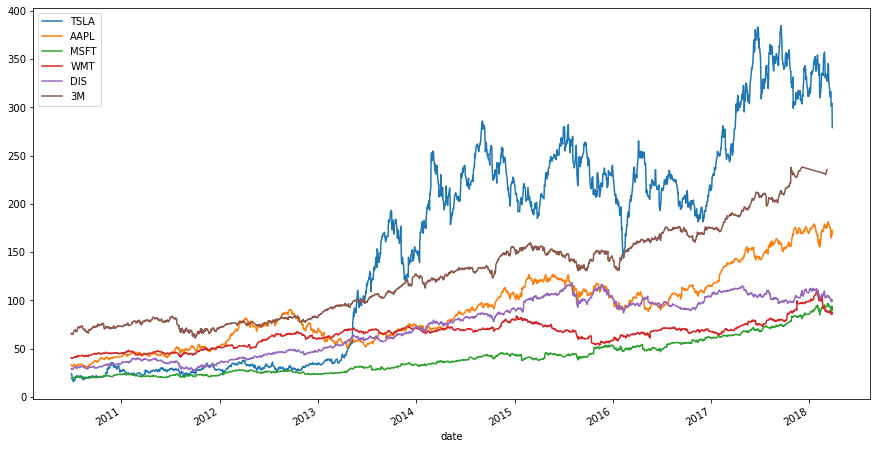

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))

# Plot the data
sub_tsla['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = 'TSLA')
sub_aapl['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = 'AAPL')
sub_msft['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = 'MSFT')
sub_wmt['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = 'WMT')
sub_dis['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = 'DIS')
sub_mmm['adj_close'].plot.line(legend = True, x = 'date', y = 'adj close', label = '3M')

# Show the plot
plt.show()

### Note 
1. Although fluctuation, all six companies ended up a higher stock price in 2018 compared to 2010.  

2. We can quickly observe that among the six selected companes, the stock price of `TSLA` fluctuates the most and surges to the highest among the six after the mid 2013. 

3. There are some relatively more obvious and longer decline trends in `DIS`(mid 2017-late 2017),  `WMT`(early 2015-late 2015), and `AAPL` (late 2012-early to mid 2013). 

### Plot stock price distributions

In [39]:
# Construct the selected companies list (for the convenience of coding) 
sub_selected_companies = [sub_tsla, sub_aapl, sub_msft, sub_wmt, sub_dis, sub_mmm]
len(sub_selected_companies)

6

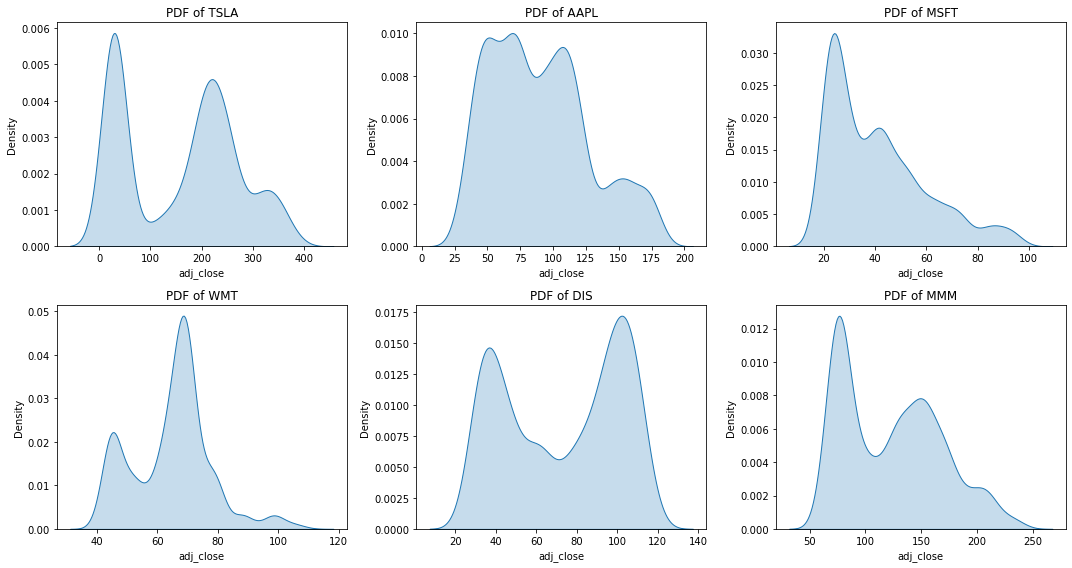

In [40]:
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize = (15, 8))  # 2 rows, 3 columns of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the PDF for each DataFrame in the corresponding subplot
for i, ax in enumerate(axes):
    sns.kdeplot(sub_selected_companies[i]['adj_close'], fill = True, ax = ax)
    ax.set_title(f'PDF of {sub_selected_companies[i].iloc[0, 0]}')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout() 

# Show the plot
plt.show()

### Note
Almost all of the six companies have a bimodal distribution with two peaks, while `AAPL` has two higher peaks and a smaller peak and MSFT has a big difference between the two peaks, or one can even interpret that as only one peak and right skewed.  

## Macroeconomic indicators<a name="Macroeconomicindicators"></a>

In [41]:
# Reset the 'date' field as index for the convenience of plotting 

for indicator in sub_macroecon_indicators: 
    indicator.set_index('date', inplace = True)

In [42]:
# Display the first five records to check 
sub_BAMLH0A0HYM2.head()

,BAMLH0A0HYM2
date,
2010-06-29,7.06
2010-06-30,7.13
2010-07-01,7.17
2010-07-02,7.13
2010-07-05,7.13


### Plot indicator distributions

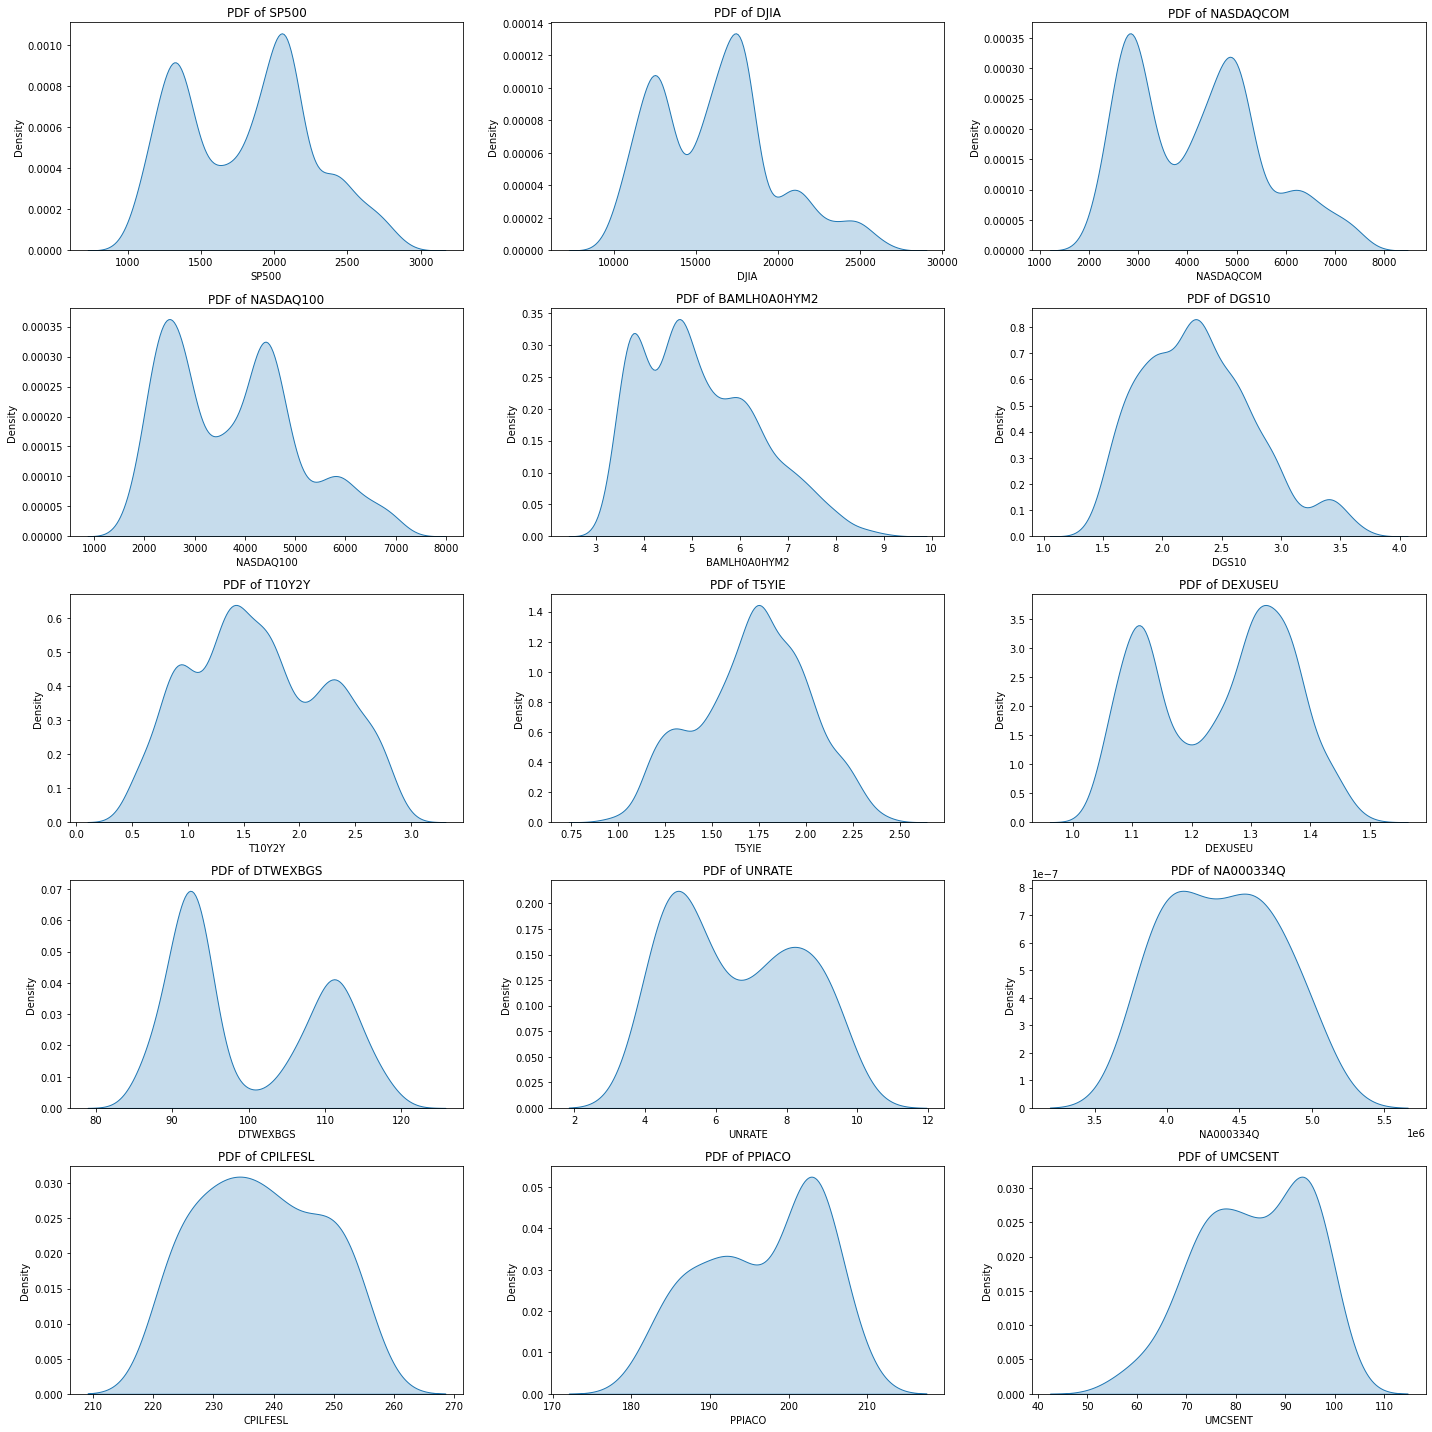

In [43]:
# import seaborn as sns

# Sample DataFrames creation (each with a single column)
df_list = [pd.DataFrame({f'data{i}': pd.Series([i + j for j in range(100)])}) for i in range(1, 16)]

# Create a figure with subplots
fig, axes = plt.subplots(5, 3, figsize = (20, 20))  # 5 rows, 3 columns of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the PDF for each DataFrame in the corresponding subplot
for i, ax in enumerate(axes):
    sns.kdeplot(sub_macroecon_indicators[i].iloc[:, 0], fill = True, ax = ax)
    ax.set_title(f'PDF of {sub_macroecon_indicators[i].columns[0]}')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Note
Like in stock price, most of the indicators have bimodal distribution with two peaks, and one might even say some have more than two peaks although not obvious. From these probability density function (PDF) plots, including the PDF plots for stock prices, one should mind that **if further analysis techniques require data to be in a specific distribution**, for example, normal distribution, **this limitation / assumption could be violated.** 

## Plot stock prices and macroeconomy indicator trends together<a name="together"></a>

In [44]:
import datetime

# Prepare for the vertical lines
year2011 = datetime.datetime(2011, 1, 1)
year2012 = datetime.datetime(2012, 1, 1)
year2013 = datetime.datetime(2013, 1, 1)
year2014 = datetime.datetime(2014, 1, 1)
year2015 = datetime.datetime(2015, 1, 1)
year2016 = datetime.datetime(2016, 1, 1)
year2017 = datetime.datetime(2017, 1, 1)
year2018 = datetime.datetime(2018, 1, 1)
years = [year2011, year2012, year2013, year2014, year2015, year2016, year2017, year2018]

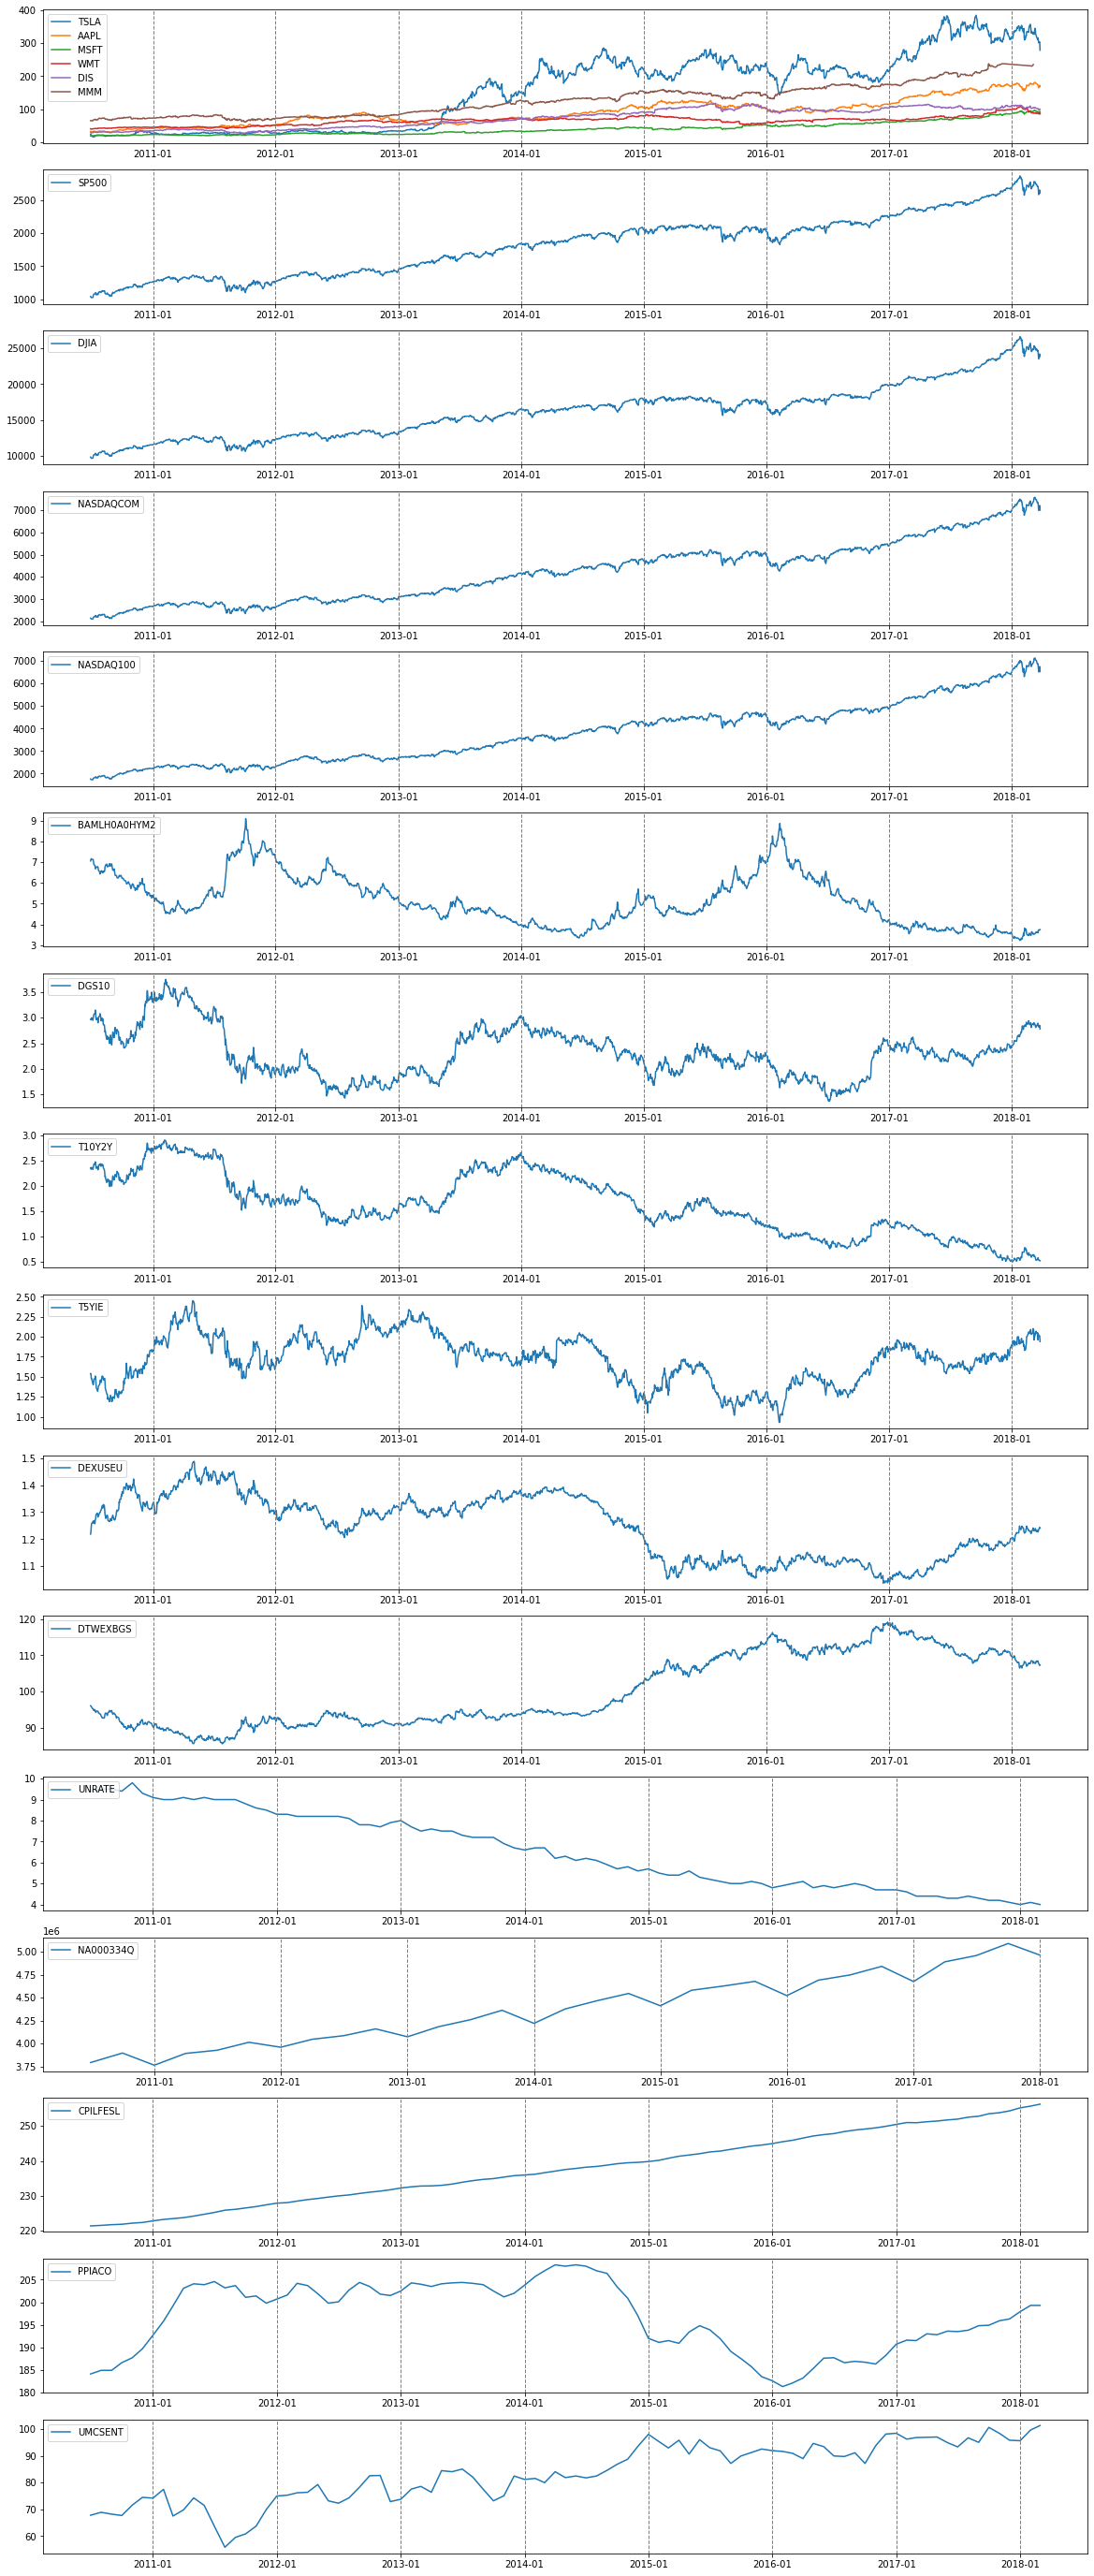

In [45]:
# Plot the macroeconomic indicators
fig = plt.figure(figsize = (20, 50))
ax0 = fig.add_subplot(16, 1, 1)
ax1 = fig.add_subplot(16, 1, 2)
ax2= fig.add_subplot(16, 1, 3)
ax3 = fig.add_subplot(16, 1, 4)
ax4 = fig.add_subplot(16, 1, 5)
ax5 = fig.add_subplot(16, 1, 6)
ax6 = fig.add_subplot(16, 1, 7)
ax7 = fig.add_subplot(16, 1, 8)
ax8 = fig.add_subplot(16, 1, 9)
ax9 = fig.add_subplot(16, 1, 10)
ax10 = fig.add_subplot(16, 1, 11)
ax11 = fig.add_subplot(16, 1, 12)
ax12 = fig.add_subplot(16, 1, 13)
ax13 = fig.add_subplot(16, 1, 14)
ax14 = fig.add_subplot(16, 1, 15)
ax15 = fig.add_subplot(16, 1, 16)
subplots = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

# Stock price
ax0.plot(sub_tsla['adj_close'], label = 'TSLA')
ax0.plot(sub_aapl['adj_close'], label = 'AAPL')
ax0.plot(sub_msft['adj_close'], label = 'MSFT')
ax0.plot(sub_wmt['adj_close'], label = 'WMT')
ax0.plot(sub_dis['adj_close'], label = 'DIS')
ax0.plot(sub_mmm['adj_close'], label = 'MMM')
ax0.legend(loc='upper left')

# Stock indexes
ax1.plot(sub_SP500, label = 'SP500')
ax1.legend(loc='upper left')

ax2.plot(sub_DJIA, label = 'DJIA')
ax2.legend(loc='upper left')

ax3.plot(sub_NASDAQCOM, label = 'NASDAQCOM')
ax3.legend(loc='upper left')

ax4.plot(sub_NASDAQ100, label = 'NASDAQ100')
ax4.legend(loc='upper left')

# Interest Rate
ax5.plot(sub_BAMLH0A0HYM2, label = 'BAMLH0A0HYM2')
ax5.legend(loc='upper left')

ax6.plot(sub_DGS10, label = 'DGS10')
ax6.legend(loc='upper left')

ax7.plot(sub_T10Y2Y, label = 'T10Y2Y')
ax7.legend(loc='upper left')

ax8.plot(sub_T5YIE, label = 'T5YIE')
ax8.legend(loc='upper left')

# Exchange Rate
ax9.plot(sub_DEXUSEU, label = 'DEXUSEU')
ax9.legend(loc='upper left')

ax10.plot(sub_DTWEXBGS, label = 'DTWEXBGS')
ax10.legend(loc='upper left')

# Unemployment rate 
ax11.plot(sub_UNRATE, label = 'UNRATE')
ax11.legend(loc='upper left')

# GDP
ax12.plot(sub_NA000334Q, label = 'NA000334Q') 
ax12.legend(loc='upper left')

# Price
ax13.plot(sub_CPILFESL, label = 'CPILFESL')
ax13.legend(loc='upper left')

ax14.plot(sub_PPIACO, label = 'PPIACO')
ax14.legend(loc='upper left')

ax15.plot(sub_UMCSENT, label = 'UMCSENT')
ax15.legend(loc='upper left')

# Add vertical lines to all the subplots
for year in years: 
    for plot in subplots:
        plot.axvline(x = year, color = 'gray', linestyle = '--', linewidth = 1)
        plot.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.show()

### Note
From the trend line plots above, we can quickly observe highly similar patterns for all stock indexes, inverse trend in U.S. index and U.S. Dollars to Euro Spot Exchange Rate, decreasing unemployment rate, seasonal fluctuation in GDP, and increasing CPI. More details can be found in the summary after correlation analysis.  

# Correlation Analysis<a name="CorrelationAnalysis"></a>

### Select a proper correlation coefficient

One of the most commonly used correlation coefficients is **Pearson correlation coefficient**, measuring linear correlation between two sets of data.  
However, there are some limitations and assumptions for it. For example:  
- The two variables should be measured on a continuous scale
- There should be a linear relationship between the two continuous variables
- Theoretically, both continuous variables should follow a normal distribution 
- There should be homoscedasticity 

The normality assumption indicates that Pearson’s correlation test is a parametric test, and from the PDF plots above, we can obviously see that this assumption is violated. If the variables of our interest take some other distribution, then a **nonparametric measurement** for correlation such as <font color="blue">**Spearman's rank correlation coefficient**</font> should be used instead of Pearson’s correlation.  


### Spearman's rank correlation coefficient
The chunk below is calculating Spearman correlation coefficients with associated p-values using [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr).  
- The Spearman rank-order correlation coefficient is a **nonparametric** measure of the monotonicity of the relationship between two datasets.  
- The **p-value** roughly indicates **the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets**.  

In [46]:
# Calculate a Spearman correlation coefficient with associated p-value

import scipy.stats

for indicator in sub_macroecon_indicators: 
    indicator_name = indicator.columns[0]
    print(indicator_name)
    
    corr_list = [] # To temporarily store correlation coefficients for means and sds calculation 
    
    for company in sub_selected_companies: 
        company_name = company.ticker.unique().item()
        close_price = pd.DataFrame(company.adj_close)
        tmp = pd.DataFrame(pd.merge(close_price, indicator, left_index = True, right_index = True, how = 'inner'))        
        
        # Spearman's correlation
        correlation, p_value = scipy.stats.spearmanr(tmp.iloc[:, 0], tmp.iloc[:, 1])
        corr_list.append(correlation)  # Append correlation coefficients
        
        # Display the results
        print(f'Correlation with {company_name}: {correlation}')
        print(f'P-value: {p_value}')
    
    # Calculate mean and standard deviation
    m = np.mean(corr_list)
    sd = np.std(corr_list, ddof = 0) 
    print(f'Mean of correlation coefficients: {m}')
    print(f'Standard deviation of correlation coefficients: {sd}')
    print('===========================================')

# suppliment comments: 
# ddof: means delta degrees of freedom, i.e. the divisor used in calculations is (number of elements - ddof)
# ddof = 0 representing “population standard deviation” 
# ddof = 1 representing “sample standard deviation”, providing the square root of an "unbiased estimate" of the variance of the population
# In our cases, sicne we are calculating standard deviation for the complete population of possible observations in a subset without sampling, we use ddof = 0

SP500
Correlation with TSLA: 0.9249673676431392
P-value: 0.0
Correlation with AAPL: 0.9433948823965533
P-value: 0.0
Correlation with MSFT: 0.9715893768542737
P-value: 0.0
Correlation with WMT: 0.834212281805678
P-value: 0.0
Correlation with DIS: 0.9463550940049417
P-value: 0.0
Correlation with MMM: 0.9855314127424211
P-value: 0.0
Mean of correlation coefficients: 0.9343417359078344
Standard deviation of correlation coefficients: 0.04890098220516263
DJIA
Correlation with TSLA: 0.9213992998583854
P-value: 0.0
Correlation with AAPL: 0.9417802821037636
P-value: 0.0
Correlation with MSFT: 0.9691143187195058
P-value: 0.0
Correlation with WMT: 0.8504171914173234
P-value: 0.0
Correlation with DIS: 0.9382435933569697
P-value: 0.0
Correlation with MMM: 0.9831581096207449
P-value: 0.0
Mean of correlation coefficients: 0.9340187991794489
Standard deviation of correlation coefficients: 0.042569428406204896
NASDAQCOM
Correlation with TSLA: 0.9273839452783734
P-value: 0.0
Correlation with AAPL: 0.949

# Summary<a name="Summary"></a>

The following conslusions is a quick summary of the correlation analysis. The more detailed explaination can be found in the following sections, where the correlation can be categorized as three levels based on empirical convention: **high correlated**, **middle correlated**, and **low correlated**, and each category can be further separated into **positively correlated** and **negatively correlated**. 

## Quick Summary<a name="QuickSummary"></a>

- **Stock Market Indexes**: `SP500`, `DJIA`, `NASDAQCOM`, `NASDAQ100` are all have **strong positive correlation with stock price movements of selected companies** since almost all of them are important large-cap companies for these indexes.  


- **Interest Rates**: `BAMLH0A0HYM2`, `DGS10`, `T10Y2Y`, `T5YIE` are all have **low-to-middle negative correlation with stock price movements of selected companies** since in the higher interest rates, investors tend to reduce the stock market investment and save more capital to earn the interest or turn to bond market for risk aversion, resulting in declining price in the stock market.  


- **Exchange Rates**: `DEXUSEU` is negatively correlated with stock price movements of selected companies, while `DTWEXBGS` is positively correlated with stock price movements of selected companies, both indicating **the strength of U.S. dollar is positively correlated with stock price.**


- **Unemployment Rate**: `UNRATE` is **strongly and negatively correlated with stock price movements of selected companies** since negative sentiment among investors could lead to decreased demand for stocks and falling prices.  


- **GDP**: `NA000334Q` is **strongly and positively correlated with stock price movements of selected companies** since higher GDP indicates a growing economy with increased production and consumption, and higher corporate earnings often lead to higher stock prices as investors anticipate better returns on their investments. Note that GDP is a lagging indicator.  


- **Prices**: **`PPIACO`(PPI) has low-to-middle negative correlation with stock price movements of selected companies** since falling PPI could potentially be seen as a sign of manageable costs for companies, and investor's positive expectation to companies can boost stock prices. **`UMCSENT`(Consumer Sentiment Index) and `CPILFESL`(CPI) are strongly and positively correlated with stock price movements of selected companies**; the former is relatively straightforward since positive consumer sentiment can boost investor confidence in the economy’s strength, leading to increased buying activity in the stock market and pushing stock prices higher. While CPI can typically have negative correlation with stock prices, here we observe its positive correlation with stock price movements of selected companies. More potential explaination can be found in the Detailed Summary section.  


We should also note that some p-values are presented 0.0, but that doesn't mean the p-values are literarily 0.  
**P-value represents the probability of obtaining a test statistic more extreme than the actual sample value given the null hypothesis is true**, and a 0 p-value suggests there is "absolutely" zero chance of getting these results if the null hypothesis is true. But there is always some chance although tiny. Thus, we should understnad that **a 0 p-value appears because it is smaller than the number that the system can represent.**   

## Detailed Summary<a name="DetailedSummary"></a>

### <font color="red">High correlation ($|\text{correlation coefficient}| > 0.7$)</font> macroeconomic indicators: 

### 1. Positive correlated
- **Stock Market Indexes** `SP500`, `DJIA`, `NASDAQCOM`, and `NASDAQ100`: Most of these important stock indexes have strong positive correlation with price movements of the selected stocks (except for TSLA not in `DJIA`, and WMT, DIS, and MMM not in `NASDAQ100`). This is due to the formulation of these indexes: these selected companies are part of the most important large-cap companies in these indexes. Slight differences in correlation coefficients could be related to diffrent composition for each index:  

    - `SP500`: The S&P 500 Index contains 500 leading companies in leading industries of the U.S. economy that cover 75% - 80% of U.S. equities and is regarded as the most representative index of the U.S. stock market. the primary sector weightings are listed: Information Technology(30.6%), Financials(12.9%), Health Care(12.0%), Consumer Discretionary(9.9%), [Data Source](https://www.spglobal.com/spdji/en/indices/equity/sp-500/#data). The S&P 500 Index is weighted by "float-adjusted market capitalization" which better reflects the actual importance of a company's stock in the market, so these impactful companies will have very strong positive correlation with `SP500`. 

    - `DJIA`: The Dow Jones Industrial Average is composed of 30 well-known "blue-chip" companies, which are typically leaders in their respective industries. The DJIA covers a wide range of industries, primarily distributed: Financials(23.6%), Information Technology(18.4%), Health Care(18.2%), and Consumer Discretionary(14.7%), [Data Source](https://www.spglobal.com/spdji/en/indices/equity/dow-jones-industrial-average/#data). The DJIA uses a "price weighted" average rather than a "market cap weighted" average, giving the higher-priced stocks more impact on the index than lower-priced stocks, even if the market capitalization of the higher-priced stocks is not necessarily larger. This could be misleading since significant percentage increases in lower-priced stocks can be easily offset by minor declines in higher-priced stocks. 

    - `NASDAQCOM` and `NASDAQ100`: The NASDAQ Composite Index is composed of all companies listed on the NASDAQ stock exchange in the U.S., weighted by "float-adjusted market capitalization". The NASDAQ Index includes over 2,500 constituent stocks, and due to the high proportion of technology stocks, The NASDAQ Composite Index is also the most important representative index of technology stocks in the U.S. Another index `NASDAQ100`, The NASDAQ-100, is composed of the 100 largest non-financial companies within the NASDAQ Composite Index, making its constituent stocks relatively concentrated. And since `NASDAQ100` does not include financial stocks, making its technology stocks approaching a higher proportion of 60%, [Data Source](https://indexes.nasdaqomx.com/Index/Breakdown/COMP). Therefore, we can observe that companies whose main business focuses more on technology like MSFT, the stock price movement has a higher correlation with `NASDAQCOM` and `NASDAQ100` compared to other two indexes, with correlation with `NASDAQ100` higher than with `NASDAQCOM`. However, one should note that this relatively tiny differences are just results of difference industry proportion in each index, the fact that these selected companies are so large that result in high correlation with these indexes is more important.  


- **U.S. Dollar Index** `DTWEXBGS`(middle with WMT): The U.S. Dollar Index shows the relative strength of the U.S. dollar. Rising U.S. Dollar Index indicates the purchasing power of the U.S. dollar is strengthening. When capital flows into the US market, whether due to optimism or for hedging reasons, it often signifies that the stock market may be lifted by these inflows. Therefore, The US Dollar Index and US stocks typically exhibit a positive correlation.  
    
    
- **GDP** `NA000334Q`: The correlation between GDP and stock price can be complex. GDP measures the value of the final goods and services produced in the U.S. comprehensively. This macroeconomic data is a lagging indicator of what the economy is currently doing, and stock prices are influenced not only by current economic conditions but also by market expectations. If investors anticipate strong future GDP growth, they may be more inclined to buy stocks in anticipation of higher corporate profits.  


- **CPI** `CPIAUCSL`: The Consumer Price Index is a backward look at the change over time in the prices consumers paid for a basket of goods and services. While CPI typically have negative correlation with stock prices, here we observe its positive correlation with stock price movements of selected companies. A positive correlation between CPI and stock prices can arise from factors such as positive economic outlook like moderate inflation supporting corporate profits and suggesting robust economic activity and demand. However, one should note that since CPI is a lagging indicator, solely focusing on this strong positive correlation observed from the data might not be the most appropriate way to understand their relationship; one should consider broader economic factors like inflation. For example, when CPI rises and PPI falls, it could mean corporate profits increase but consumers face pressure from rising prices; this could potentially lead to market concerns about inflation expectation, or could simply indicate CPI haven't react to the market since PPI is seen as the leading index for CPI.  


- **Consumer Sentiment Index** `UMCSENT`: [A monthly survey of consumer confidence levels in the U.S.](https://data.sca.isr.umich.edu/fetchdoc.php?docid=24770) with regards to the economy, personal finances, business conditions, and buying conditions, conducted by the University of Michigan. Its strong positive correlation with stock price is relatively straightforwards: rising consumer confidence index indicates that consumers have a stronger willingness to spend on goods and services, which is beneficial for economic expansion, and increasing demand can potentially drive stock price. Conversely, declining consumer confidence index suggests a weaker willingness to spend, increasing the likelihood of economic slowdown, and stock price also drops in low demand. 



### 2. Negative correlated
- **U.S. Dollars to Euro Spot Exchange Rate** `DEXUSEU`(middle with TSLA, WMT): This indicator measures U.S. Dollars to One Euro, and smaller number indicates stronger U.S. dollars. Therefore, just like how we explain `DTWEXBGS`(The U.S. Dollar Index), stronger U.S. dollars can drive the stock market, meaning that smaller values in `DEXUSEU` are correlated to growing stock price, which is a negative correlation. 


- **Unemployment Rate** `UNRATE`: Unemployment rate represents the number of unemployed as a percentage of the labor force. Low unemployment rate indicates companies are more willing to hire; people get income and the consumer market naturally prospers, leading to a rise in the stock market. Conversly, companies hire less under high unemployment rate, leading to unstable income, and decline in the stock market. We should also note that since the unemployment rate reflects economic phenomena from the past month, it is considered a lagging indicator by nature. 

### <font color="red">Middle correlation ($0.2 <= |\text{correlation coefficient}| <= 0.7$ )</font> macroeconomic indicators: 

### 1. Positive correlated
None in the selected macroeconomic indicators in the given analysis period. 


### 2. Negative correlated
- **The ICE BofA Option-Adjusted Spreads (OASs)** `BAMLH0A0HYM2`(high with WMT): This index evaluates the difference between the yield of a bond and the yield of a risk-free benchmark after accounting for the impact of these embedded options. A higher OAS can indicate higher perceived risk, and this can lead to higher borrowing costs for the company, affecting its profitability and potentially lowering its stock price. Therefore we can observe the negative correlation between `BAMLH0A0HYM2` and stock prices.


- **Curve Steepner** `T10Y2Y`(high with AAPL, MSFT): Short-term bonds typically have lower yields than longer-term bonds. A steepening yield curve can indicate the increasing risk premium required to compensate for the risks of long-term treasury, and sometimes can indicate inflation. This could negatively affect stock price since less money will be invested in the stock market, and more will be put into the bond market for earning interest or risk aversion. 


- **5-Year Breakeven Inflation Rate** `T5YIE`(low with WMT): The breakeven inflation rate implies what market participants expect inflation to be in the next 5 years, on average. Higher breakeven inflation rates can lead to expectations of rising interest rates, and higher interest rates will increase borrowing costs for companies and consumers, potentially leading to lower corporate earnings and lower stock prices, and can also cause less money to be invested in the stock market for risk aversion, similarly as we discuss above.   


- **PPI** `PPIACO`(low with TSLA, WMT): Generally, rising PPI indicates an increase in producers' costs. If producers are unable to effectively pass on these costs, it may lead to a decline in corporate profits, negatively affecting their stock prices. However, a rise in PPI does not necessarily mean stock prices will fall. For example, raw material producers or the energy industry can sell at higher prices and increase their profits, which can boost their stock performance. These situations vary from industries, which can be potentially observed from the larger standard deviation in correlation coefficients with PPI for the selected companies. Furthermore, the relationship between PPI and CPI is closely linked. Here we observe an increasing CPI, while PPI has relatively unstable trends. In the scenario of increasing CPI and decreasing PPI, it could indicate increasing corporate profits, but consumers face pressure from rising prices, which could lead to market concerns about inflation expectations. But one should also note that since here we only analyze data across eight years and CPI is a lagging index, the relationship among CPI, PPI, and stock prices might be interpreted in a more proper way in the long run.  

### <font color="red">Low correlation ($|\text{correlation coefficient}| < 0.2$)</font> macroeconomic indicators: 

### 1. Positive correlated 
None in the selected macroeconomic indicators in the given analysis period. 



### 2. Negative correlated
- **Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity** `DGS10`: Typically, the performance of bonds and stocks is negatively correlated, as we observe here. The U.S. Treasury Securities have been seen as relatively safe investments. When investors anticipate a decline in the stock market and market sentiment turns to panic, they seek lower-risk investments such as U.S. Treasury bonds. 

# Conclusion And The Next Step<a name="ConclusionNextStep"></a>

From the analysis above, first we performed **data transformation** to make sure the data is clean and in the correct data types. We also **check and drop rows with missing values** since the amount is not hurting our analysis. Then considering the correlation analysis should use `date` as index to combine the stock prices and the indicator, we select **subsets** for both selected stocks and indicators, and from the visualization we know that rather than Pearson correlation coefficient that commenly used, a **nonparametric Spearman's rank correlation coefficient** should be utilized. Finally, we got insights from the correlation analysis and **identify 10 most impactful macroeconomic indicators that have strong correlation with the select stock price movements.** 

At this time, since the objective of this project is not a predictive task, the predictive model is not built.  
If in the future the prediction is desired to be carried out, one can consider the following methods:  

- Connduct **Kernel Density Estimation (KDE)**: Use KDE to smooth the data and better understand its distribution. (Notethat KDE is not a transformation but helps in visualizing the underlying distribution)  

- Conduct **time series analysis**

- Consider potential **variable transformation**
    - Log transformation
    - Box-cox transformation 
    - Gaussian Mixture Model (GMM): To handle the bimodal distribution, fit a Gaussian Mixture Model (GMM) to the data, which can model the data as a mixture of multiple Gaussian distributions. Then sample from the fitted GMM to get normally distributed data  
    
- Conduct analysis using a **longer period** for deeper understanding of the correlation between factors